In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os.path
import datetime


#initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#twitter API Keys (load from untracked_api_key.txt)
with open('untracked_api_key_twitter.txt', 'r') as file_object:
    #Text document that is untracked in project-one directory (NOT pushed to git) with API key
    #Create a file called untracked_api_key.txt with your key and DO NOT add to git when commiting or pushing changes file_object.readline()
    consumer_key  = str(file_object.readline()).strip()
    consumer_secret = str(file_object.readline()).strip()
    access_token = str(file_object.readline()).strip()
    access_token_secret = str(file_object.readline()).strip()

#tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
plt.rcParams["axes.labelsize"] = 12

In [3]:
#target_user_list = ["@BBCNews", "@CBS", "@CNN", "@foxnews","@nytimes"]

target_user_list = ["@Quantstamp","@BTC","@Ripple","@ethereum","@0xProject"]
# Target user list must have 5 items while marker for pairplot is hard-set

sentiments = []

# Print target_user_list whiel removing single-dash quotes from each user element
print("Beginning tweet retrival from: ")
print('[%s]' % ', '.join(map(str, target_user_list)))
# Alternate method:
#print("[{0}]".format(', '.join(map(str, target_user_list))))
print("================================================")
# Loop through 5 pages of tweets (total 100 tweets)
for user in target_user_list:
        counter = 1
        #Obtain 100 recent tweets from home feed per user in target_user_list
      
        public_tweets = api.user_timeline(user, count = 100,result_type="recent")
        print("Retriving tweets from %s"%user)
        
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter

            # Add sentiments for each tweet into an array
            sentiments.append({"User":user,
                               "Date": tweet["created_at"], 
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
          
            # Add to counter 
            counter = counter + 1
print("================================================")
print("Tweet retrival completed.") 

Beginning tweet retrival from: 
[@Quantstamp, @BTC, @Ripple, @ethereum, @0xProject]
Retriving tweets from @Quantstamp
Retriving tweets from @BTC
Retriving tweets from @Ripple
Retriving tweets from @ethereum
Retriving tweets from @0xProject
Tweet retrival completed.


In [4]:
#convert sentiment list into dataframe object
sentiments_pd = pd.DataFrame.from_dict(sentiments)
#reorder columns in dataframe
sentiments_pd = sentiments_pd[['User','Date','Tweet','Tweets Ago','Compound','Negative','Neutral','Positive']]

sentiments_pd.head()

,User,Date,Tweet,Tweets Ago,Compound,Negative,Neutral,Positive
0,@Quantstamp,Wed Oct 10 17:56:05 +0000 2018,"Seen here at 10 years old in Siberia, VP of St...",1,0.0000,1.000,0.0,0.000
1,@Quantstamp,Wed Oct 10 15:14:04 +0000 2018,"RT @kellytobias123: Today in Seoul, #IOST CEO ...",2,0.0000,1.000,0.0,0.000
2,@Quantstamp,Tue Oct 09 03:55:19 +0000 2018,"RT @Fluence_One: Ed Zulkoski, Senior Security ...",3,0.6249,0.746,0.0,0.254
3,@Quantstamp,Tue Oct 09 02:56:27 +0000 2018,RT @golemproject: Full house at the @polychain...,4,0.0000,1.000,0.0,0.000
4,@Quantstamp,Mon Oct 08 16:22:05 +0000 2018,"Join us at @polychaincap for “Web3 stack, what...",5,0.6486,0.751,0.0,0.249


In [5]:
sentiments_pd.tail()

,User,Date,Tweet,Tweets Ago,Compound,Negative,Neutral,Positive
495,@0xProject,Mon Jun 25 17:29:11 +0000 2018,RT @ledgerdex: We are very excited to announce...,96,0.4561,0.885,0.00,0.115
496,@0xProject,Fri Jun 22 19:22:09 +0000 2018,Please join us in welcoming Mel Oberto to the ...,97,0.8622,0.642,0.00,0.358
497,@0xProject,Thu Jun 21 21:36:07 +0000 2018,@mihaithoracic @etherscan @ethplorer @RadarRel...,98,-0.3506,0.790,0.21,0.000
498,@0xProject,Tue Jun 19 15:11:07 +0000 2018,RT @RadarRelay: The Radar Relay beta is comple...,99,0.0000,1.000,0.00,0.000
499,@0xProject,Mon Jun 18 16:05:52 +0000 2018,RT @ledgerdex: LedgerDex is the next generatio...,100,0.2023,0.921,0.00,0.079


In [6]:
sentiments_pd.sample(20)

,User,Date,Tweet,Tweets Ago,Compound,Negative,Neutral,Positive
497,@0xProject,Thu Jun 21 21:36:07 +0000 2018,@mihaithoracic @etherscan @ethplorer @RadarRel...,98,-0.3506,0.790,0.210,0.000
357,@ethereum,Thu Oct 12 05:39:55 +0000 2017,[Blog] Byzantium Hard Fork Announcement. Updat...,58,-0.1759,0.825,0.175,0.000
192,@BTC,Sat Jun 30 14:51:12 +0000 2018,Old to new market comparison. $BTC https://t.c...,93,0.0000,1.000,0.000,0.000
409,@0xProject,Thu Oct 04 16:53:08 +0000 2018,The emerging Security Token Tech Stack 🥞 https...,10,0.3400,0.714,0.000,0.286
61,@Quantstamp,Thu Aug 23 23:46:22 +0000 2018,Don’t miss our very own VP of Strategy @OlgaVM...,62,-0.2244,0.894,0.106,0.000
78,@Quantstamp,Fri Aug 10 13:33:56 +0000 2018,RT @Modular_Inc: We are excited to be a part o...,79,0.7777,0.729,0.000,0.271
199,@BTC,Thu Jun 28 14:07:49 +0000 2018,"#Bitcoin was around 9 years ago, and it will s...",100,0.0000,1.000,0.000,0.000
202,@Ripple,Fri Oct 05 15:22:13 +0000 2018,Read @_emschwartz’s post on why @interledger’s...,3,0.7110,0.717,0.000,0.283
77,@Quantstamp,Fri Aug 10 15:45:06 +0000 2018,Jan speaking yesterday at @Stanford about comp...,78,0.4019,0.803,0.000,0.197
83,@Quantstamp,Thu Aug 09 02:59:01 +0000 2018,Join Richard Ma for our weekly AMA in our Tele...,84,0.2960,0.864,0.000,0.136


In [7]:
# save sentiment data to csv
sentiments_pd.to_csv("TwitterMoodSentiment.csv")

In [8]:
sentiments_pd_grouped = sentiments_pd.groupby(['User'])
#sentiments_pd_grouped.count().head()
#for user in sentiments_pd_grouped["User"]:
#plt.scatter(sentiments_pd_grouped["Tweets Ago"],sentiments_pd_grouped["Compound"])
#plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
#plt.legend(sentiments_pd["User"])
#plt.ylabel("Tweet Polarity")
#plt.xlabel("Tweets Ago")
#plt.show()

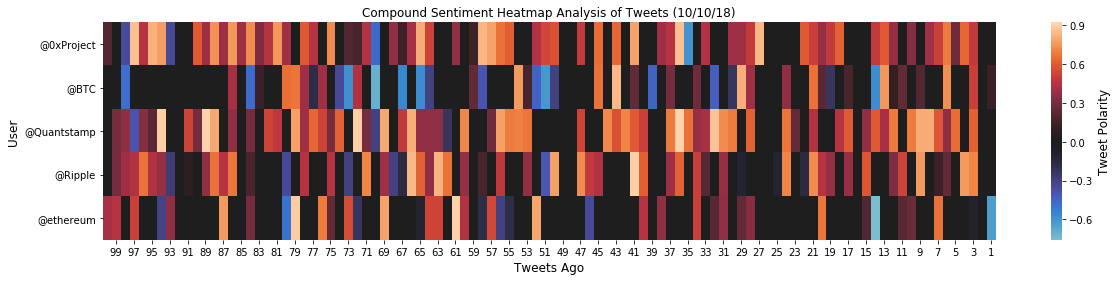

In [9]:
# Compound sentiment heatmap
plt.figure(figsize = (20,4))
plt.title("Compound Sentiment Heatmap Analysis of Tweets (%s)" % (time.strftime("%x")))
sentiments_pd_p = sentiments_pd.pivot("User", "Tweets Ago", "Compound")
ax = sns.heatmap(sentiments_pd_p, center = 0,  cbar_kws={'label': 'Tweet Polarity'})
ax.invert_xaxis()
plt.savefig("compound_sentiment_heatmap")
plt.show()

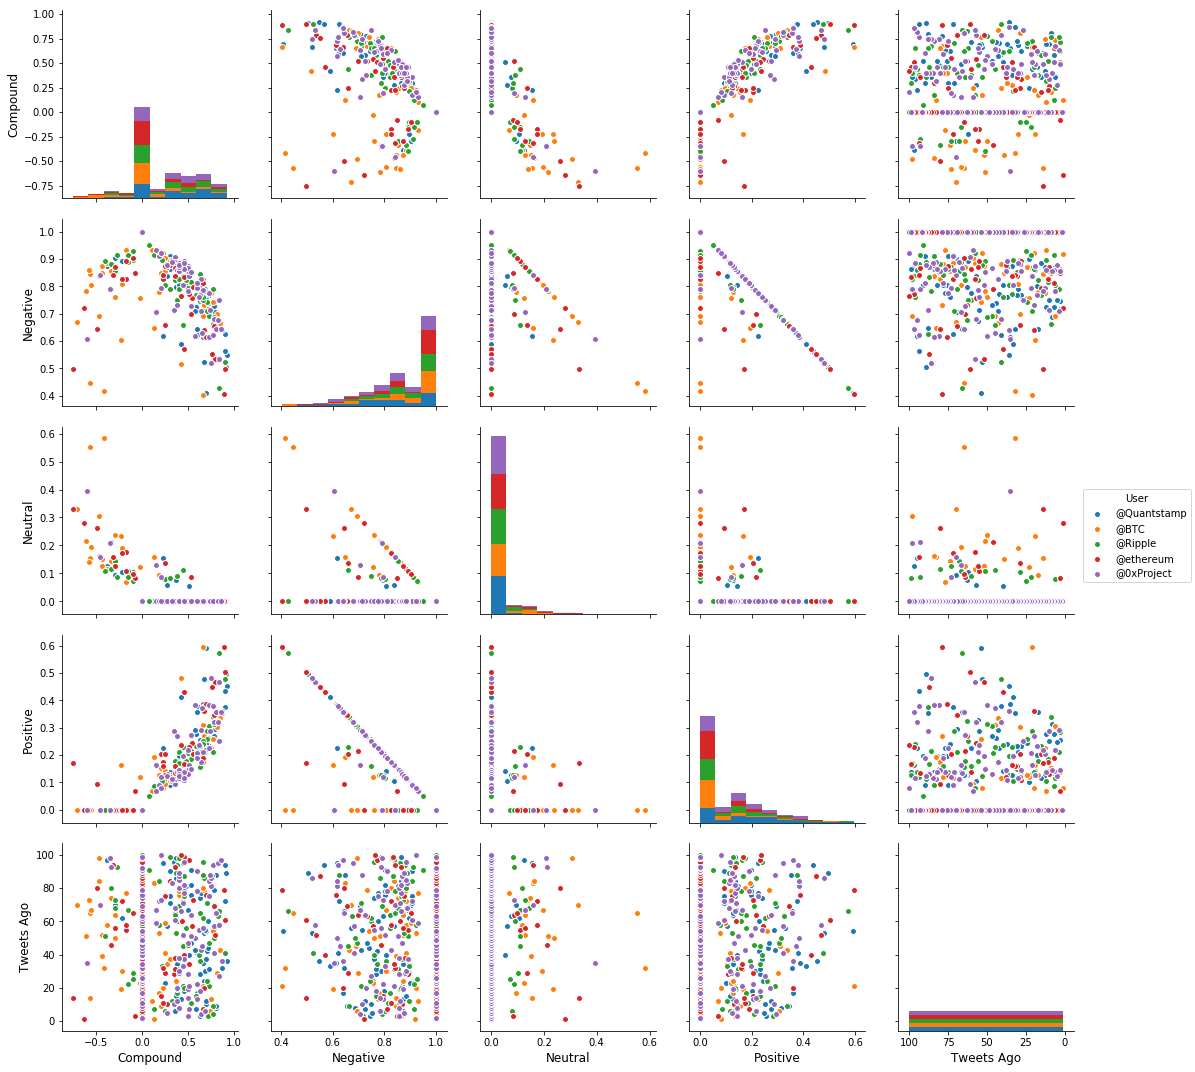

In [10]:
#plt.rcParams['figure.figsize']=(10,10)
#sns.pairplot(sentiments_pd, hue="User", x_vars=["Tweets Ago"],y_vars=["Compound","Negative","Neutral", "Positive"])
#ax.set_visible(False)

# User hue to show different levels of categoriacal variable
    # In this case, categorical variable = User
#sns.set(font_scale =1.2)
g = sns.pairplot(sentiments_pd, hue="User",vars =  ['Compound','Negative','Neutral','Positive','Tweets Ago'], \
                 size=3, aspect=1) #markers=["o", "s", "D","x","+"])
# Plot only lower triangle grid of pairplots:
    # set_visible must be False
#for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    #g.axes[i, j].set_visible(False)

plt.gca().invert_xaxis()
plt.savefig("pairplot_sentiment_histogram_scatter")
plt.show()

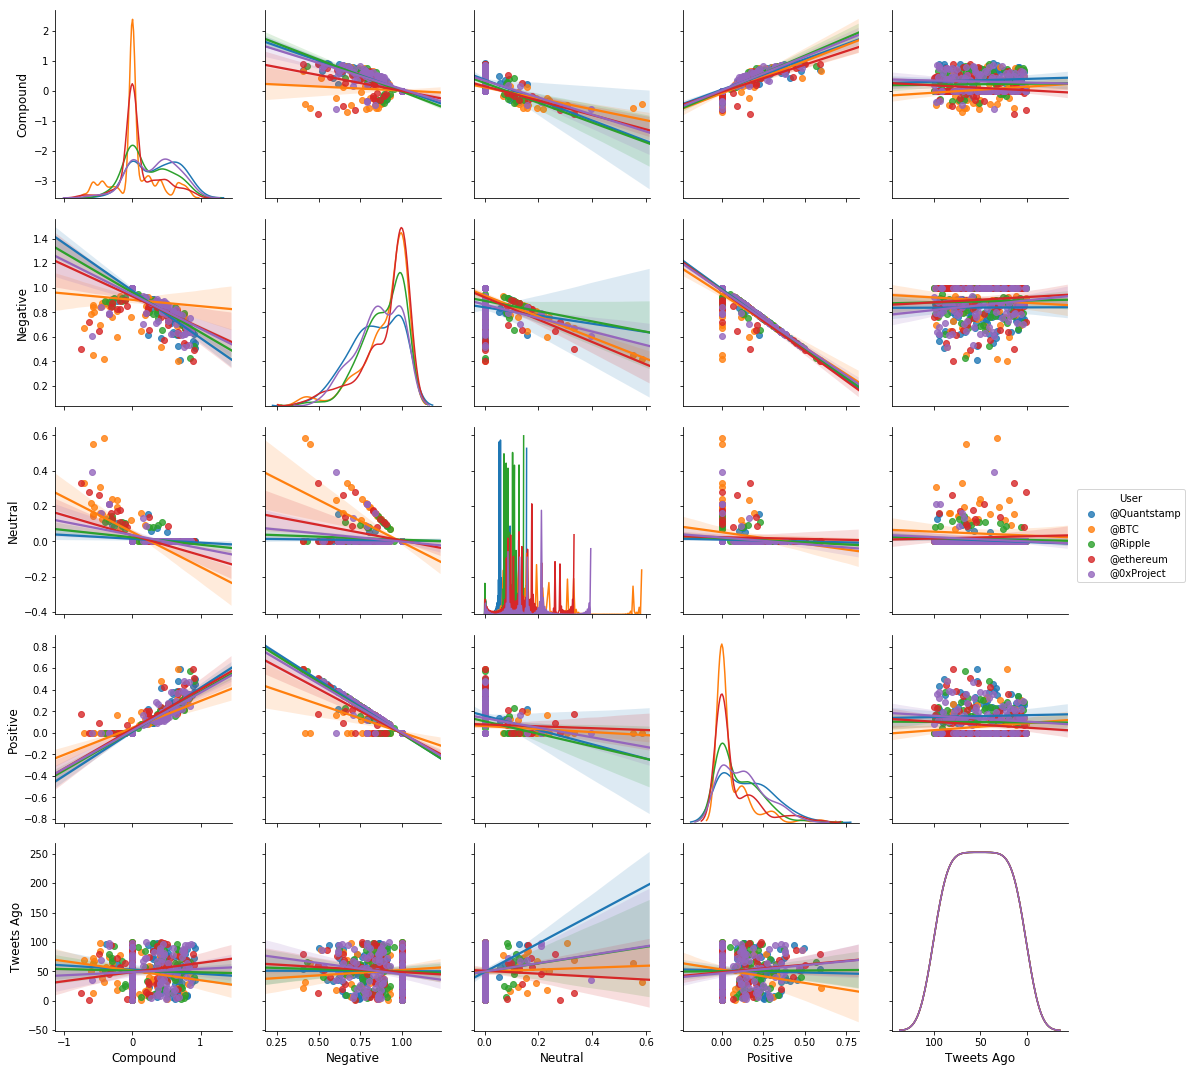

In [11]:
g = sns.pairplot(sentiments_pd, hue="User",vars = ['Compound','Negative','Neutral','Positive','Tweets Ago'], \
                 size=3, aspect=1,kind = "reg",diag_kind ="kde") #markers=["o", "s", "D","x","+"])
# Plot only lower triangle grid of pairplots:
    # set_visible must be False
#for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    #g.axes[i, j].set_visible(False)

plt.gca().invert_xaxis()
plt.savefig("pairplot_sentiment_grid_reg_lineplot")
plt.show()

In [12]:
#sns.jointplot(sentiments_pd["Tweets Ago"], sentiments_pd["Compound","Neutral"], kind="hex")

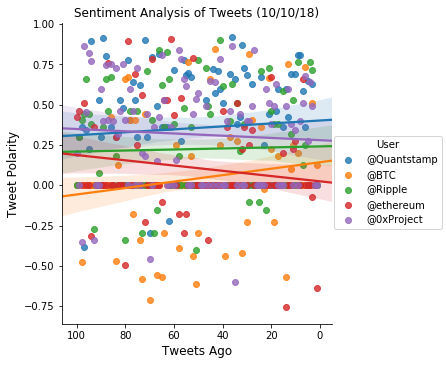

In [13]:
plt.figure(figsize=(20,20))
sns.lmplot("Tweets Ago", "Compound", data=sentiments_pd, hue='User', fit_reg=True)
plt.title("Sentiment Analysis of Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.gca().invert_xaxis()

plt.savefig("general_tweet_sentiment_scatter")
plt.show()

In [14]:
#sentiments_pd_grouped = sentiments_pd.groupby(['User'])
#color=["lightblue", 'green', 'red', 'blue', 'gold']
#plt.bar(sentiments_pd['User'], sentiments_pd['Compound'],color=["lightblue", 'green', 'red', 'blue', 'gold'])
#plt.title("Overall Media Sentiment of Tweets (%s)" % (time.strftime("%x")))
#plt.ylabel("Tweet Polarity")
#plt.xlabel("User Account")
#plt.legend(['Compound','Negative','Neutral','Positive'])
#color=["lightblue", 'green', 'red', 'blue', 'gold']
#sentiments_pd[['Compound','Negative','Neutral','Positive']]
#plt.legend()
#plt.savefig("overall_tweet_sentiment_bar")
#plt.show()

In [15]:
# Average compound tweet score per user
compound_polarity_df = sentiments_pd.groupby(["User"]).mean()["Compound"]
pd.DataFrame(compound_polarity_df)
#import datetime
#today = datetime.datetime.today().strftime('%Y-%m-%d')

,Compound
User,
@0xProject,0.314020
@BTC,0.041244
@Quantstamp,0.354946
@Ripple,0.224297
@ethereum,0.106316


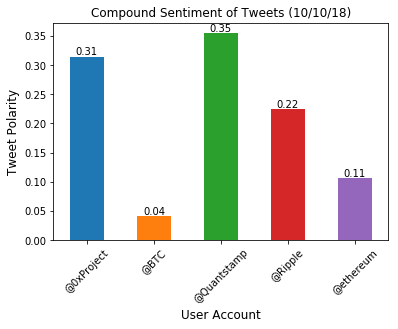

In [16]:
# Mean sentiment per user account, visualized:

ax = compound_polarity_df.plot.bar()
# Source for barchart label placement:
    #https://stackoverflow.com/a/34598688
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel("User Account")
plt.title("Compound Sentiment of Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("User Account")
plt.xticks(rotation=45)
plt.savefig("compound_tweet_sentiment_bar")
plt.show()


In [87]:
# Correlation chart - qualitative/paired colormap
corr = sentiments_pd.corr(method='pearson')
corr.style.background_gradient()
corr.style.background_gradient().set_precision(3)
corr.style.background_gradient(cmap='Dark2')

,Tweets Ago,Compound,Negative,Neutral,Positive
Tweets Ago,1,-0.0155062,-0.0393187,0.057072,0.0135108
Compound,-0.0155062,1,-0.609837,-0.47342,0.863937
Negative,-0.0393187,-0.609837,1,-0.31859,-0.889972
Neutral,0.057072,-0.47342,-0.31859,1,-0.148717
Positive,0.0135108,0.863937,-0.889972,-0.148717,1


In [59]:
# Correlation chart - sequential/linear colormap 
corr = sentiments_pd.corr(method='pearson')
corr.style.background_gradient()
corr.style.background_gradient().set_precision(3)
corr.style.background_gradient(cmap='coolwarm')

,Tweets Ago,Compound,Negative,Neutral,Positive
Tweets Ago,1,-0.0155062,-0.0393187,0.057072,0.0135108
Compound,-0.0155062,1,-0.609837,-0.47342,0.863937
Negative,-0.0393187,-0.609837,1,-0.31859,-0.889972
Neutral,0.057072,-0.47342,-0.31859,1,-0.148717
Positive,0.0135108,0.863937,-0.889972,-0.148717,1


In [85]:
# Correlation chart per user - sequential/linear colormap
sentiments_pd_grouped = sentiments_pd.groupby(['User'])
corr = sentiments_pd_grouped.corr(method='pearson')
corr.style.background_gradient()
corr.style.background_gradient().set_precision(3)
corr.style.background_gradient(cmap='coolwarm')